In [1]:
import pandas as pd

# Load the data
file_path = 'D:/Capstone-MS/eda_final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,County,Postal_Code,County_name,State_Full_Name,Year,GeoFIPS,Establishments,PAYANN-EST,Poverty_Estimate_All_Ages,Poverty_Percent_ All_Ages,...,RNETMIG,Labor Force,Employed,Unemployed,Unemployment_rate,AVG_INC_PERJOB,Establishments_per_capita,Payroll_per_capita,GDP_per_capita,GDP
0,"Autauga County, Alabama",AL,Autauga County,Alabama,2017,"""01001""",869,360936,7390,13.4,...,0.849656,26269,25224,1045,4.0,37640,0.015689,6.516266,31.820870,1762558
1,"Baldwin County, Alabama",AL,Baldwin County,Alabama,2017,"""01003""",5384,2087497,21199,10.1,...,22.398256,93152,89286,3866,4.2,36145,0.025334,9.822545,34.738016,7382558
2,"Barbour County, Alabama",AL,Barbour County,Alabama,2017,"""01005""",455,237076,7414,33.4,...,-24.998528,8415,7914,501,6.0,38845,0.018086,9.423858,30.280280,761761
3,"Bibb County, Alabama",AL,Bibb County,Alabama,2017,"""01007""",284,136216,4137,20.2,...,-3.234669,8648,8261,387,4.5,39639,0.012594,6.040621,18.037295,406741
4,"Blount County, Alabama",AL,Blount County,Alabama,2017,"""01009""",698,215192,7343,12.8,...,6.193562,25009,23979,1030,4.1,36760,0.012079,3.723883,17.096700,987967


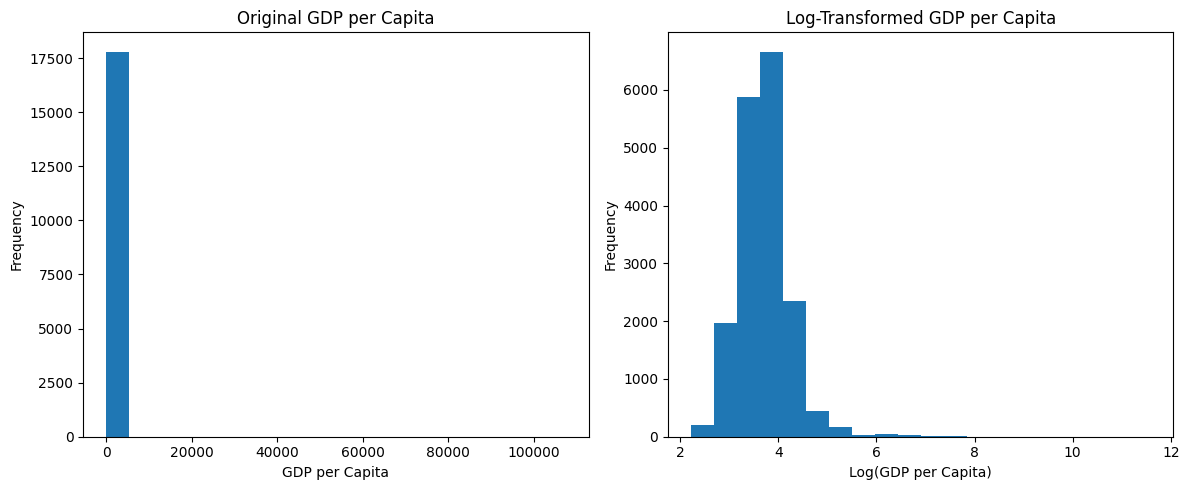

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Check if there are any non-positive values in GDP_per_capita before transformation
non_positive_values = data[data['GDP_per_capita'] <= 0]

# Log transform the GDP_per_capita column (handling non-positive cases if needed)
if non_positive_values.empty:
    data['Log_GDP_per_capita'] = np.log(data['GDP_per_capita'])
else:
    print("There are non-positive values in 'GDP_per_capita'. Log transformation skipped for those rows.")

# Plotting the distributions before and after transformation for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original GDP per capita distribution
axes[0].hist(data['GDP_per_capita'], bins=20)
axes[0].set_title('Original GDP per Capita')
axes[0].set_xlabel('GDP per Capita')
axes[0].set_ylabel('Frequency')

# Log-transformed GDP per capita distribution
axes[1].hist(data['Log_GDP_per_capita'], bins=20)
axes[1].set_title('Log-Transformed GDP per Capita')
axes[1].set_xlabel('Log(GDP per Capita)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
data.head()

,County,Postal_Code,County_name,State_Full_Name,Year,GeoFIPS,Establishments,PAYANN-EST,Poverty_Estimate_All_Ages,Poverty_Percent_ All_Ages,...,Labor Force,Employed,Unemployed,Unemployment_rate,AVG_INC_PERJOB,Establishments_per_capita,Payroll_per_capita,GDP_per_capita,GDP,Log_GDP_per_capita
0,"Autauga County, Alabama",AL,Autauga County,Alabama,2017,"""01001""",869,360936,7390,13.4,...,26269,25224,1045,4.0,37640,0.015689,6.516266,31.820870,1762558,3.460122
1,"Baldwin County, Alabama",AL,Baldwin County,Alabama,2017,"""01003""",5384,2087497,21199,10.1,...,93152,89286,3866,4.2,36145,0.025334,9.822545,34.738016,7382558,3.547835
2,"Barbour County, Alabama",AL,Barbour County,Alabama,2017,"""01005""",455,237076,7414,33.4,...,8415,7914,501,6.0,38845,0.018086,9.423858,30.280280,761761,3.410497
3,"Bibb County, Alabama",AL,Bibb County,Alabama,2017,"""01007""",284,136216,4137,20.2,...,8648,8261,387,4.5,39639,0.012594,6.040621,18.037295,406741,2.892442
4,"Blount County, Alabama",AL,Blount County,Alabama,2017,"""01009""",698,215192,7343,12.8,...,25009,23979,1030,4.1,36760,0.012079,3.723883,17.096700,987967,2.838885


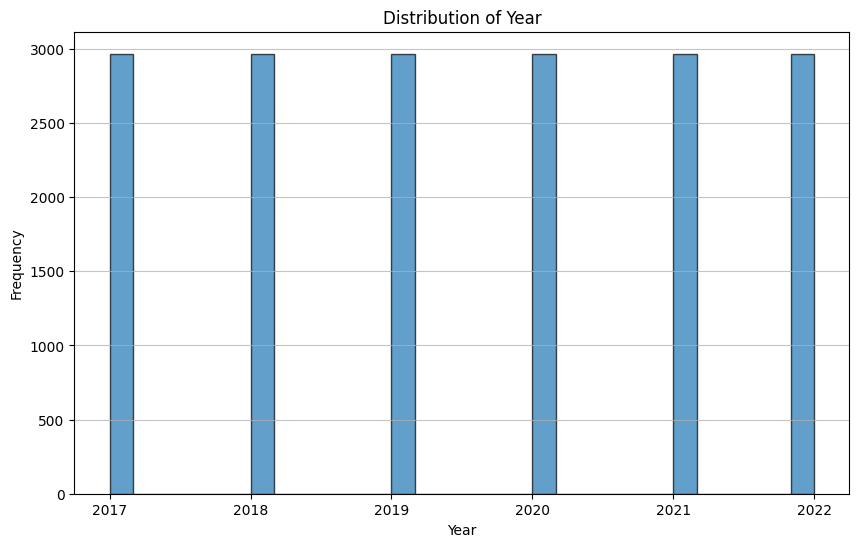

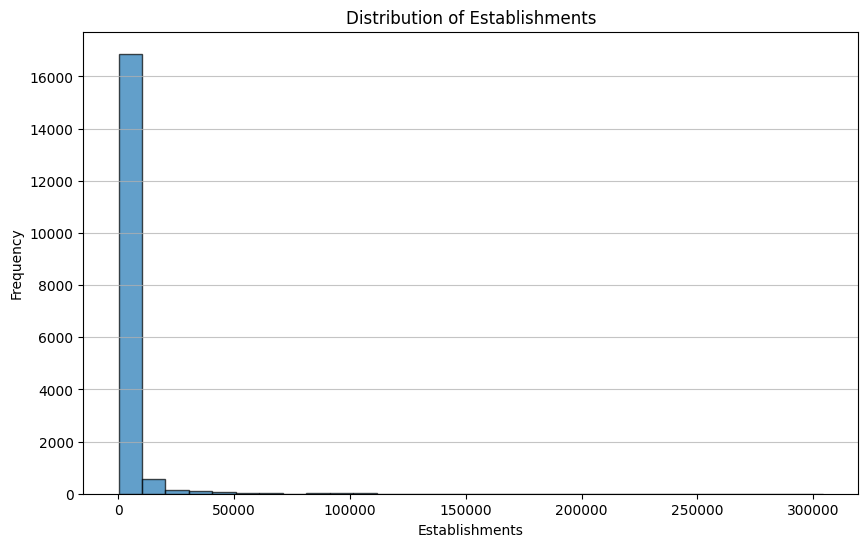

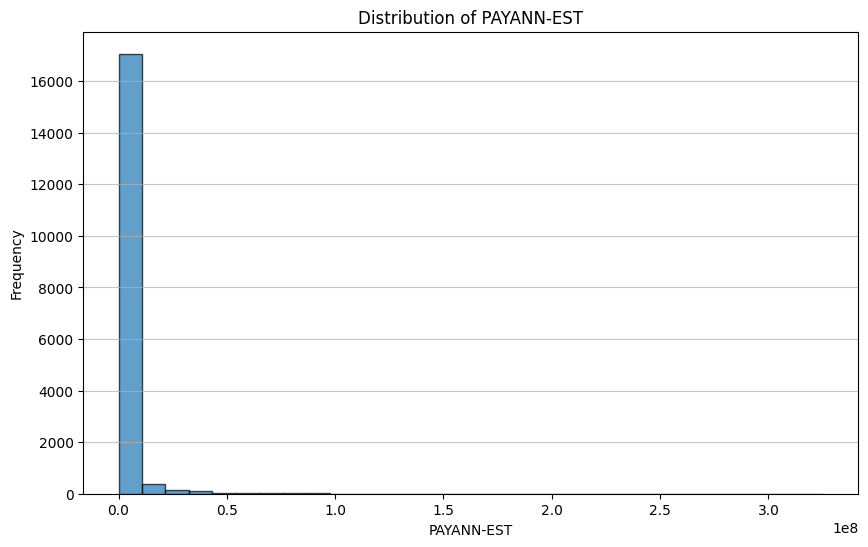

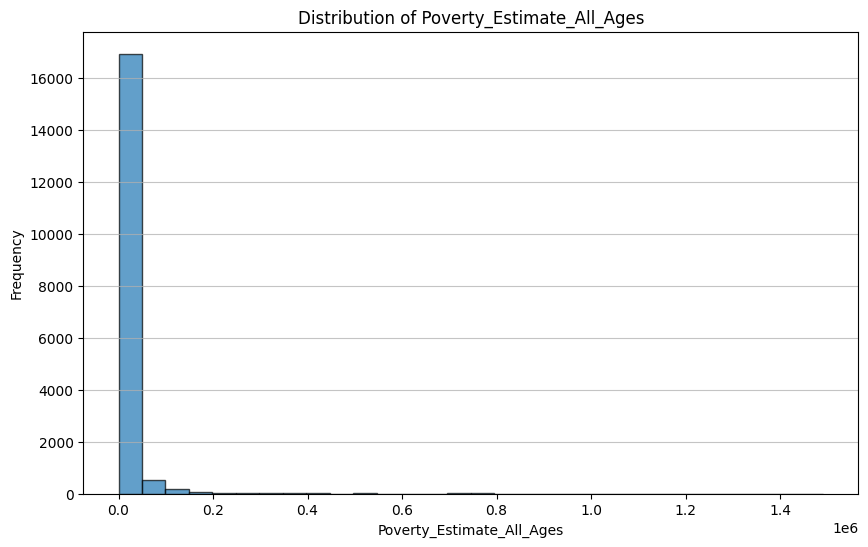

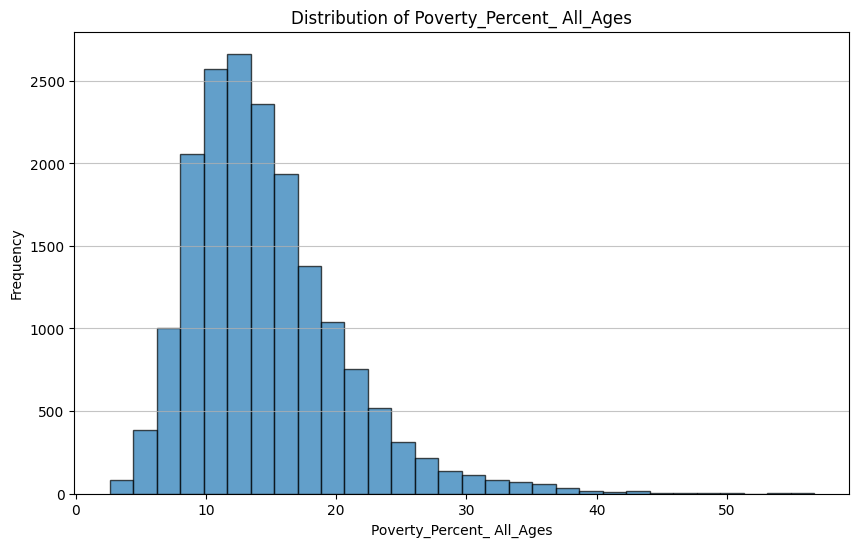

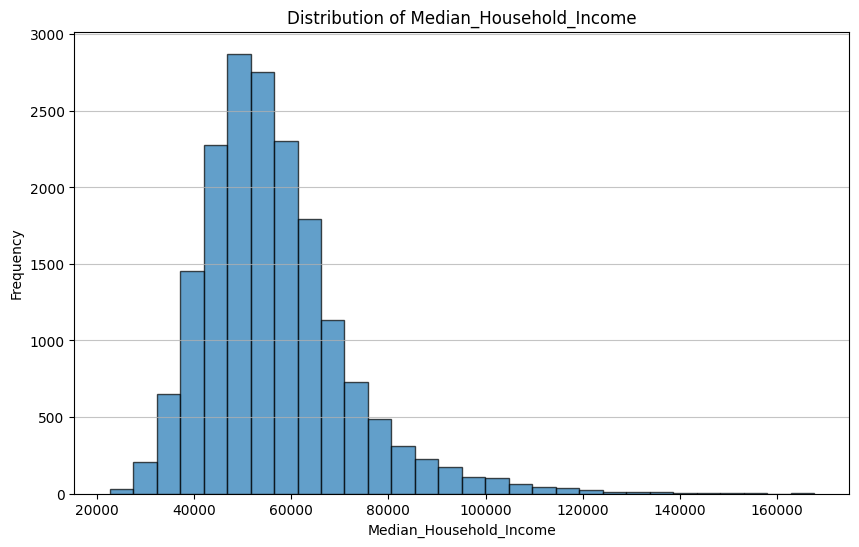

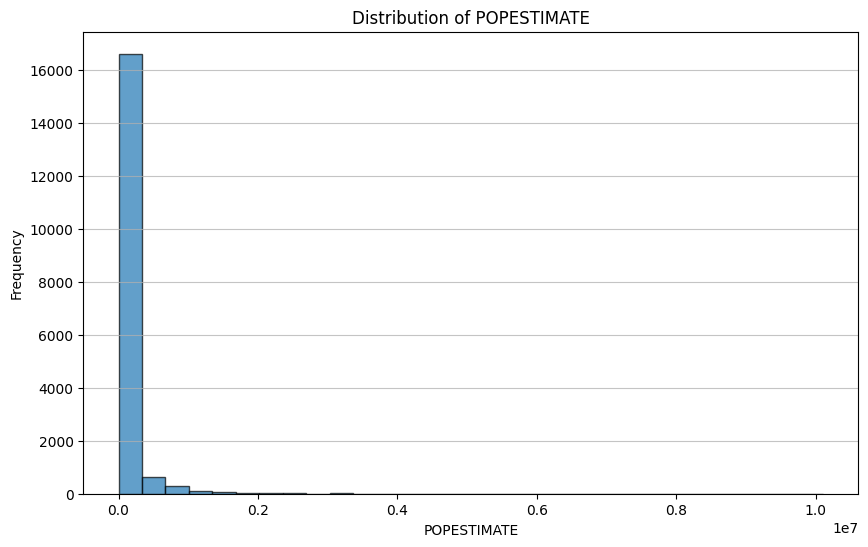

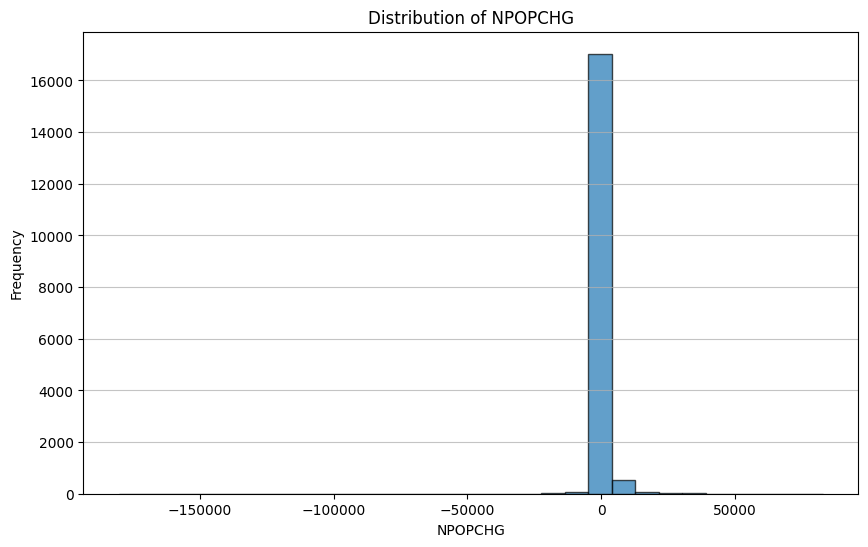

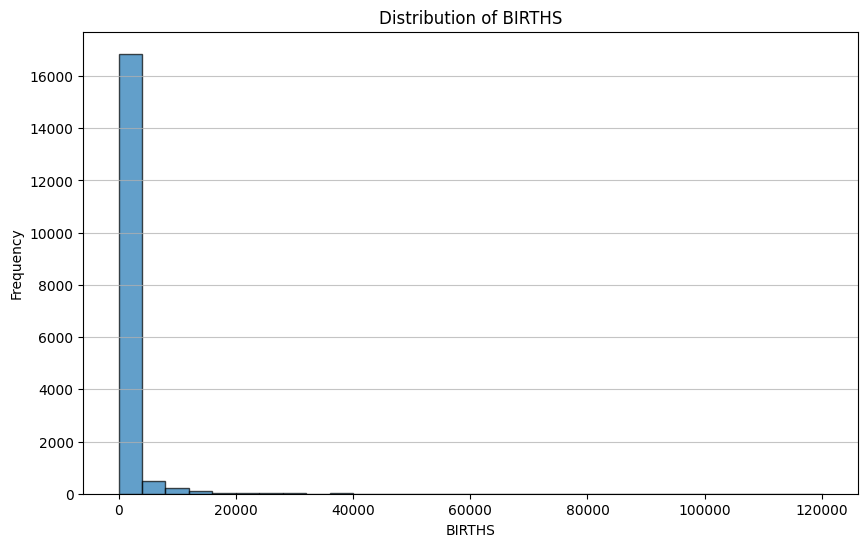

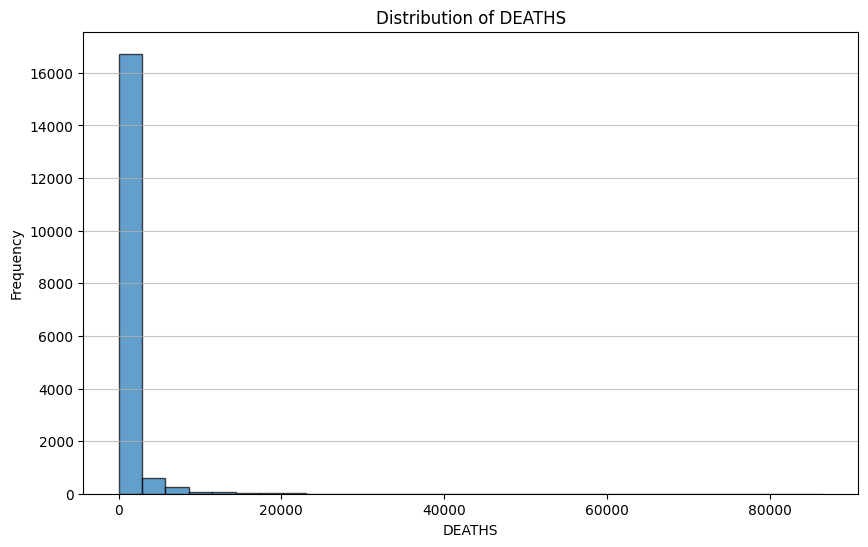

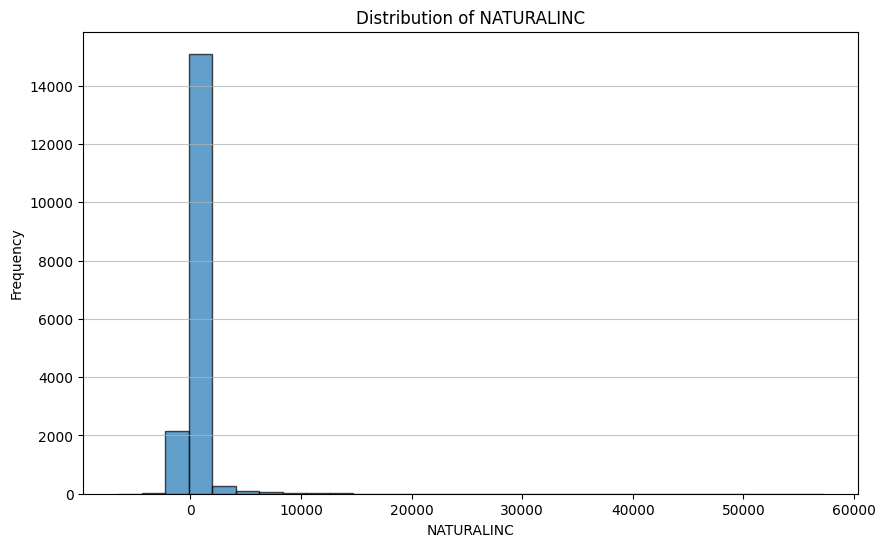

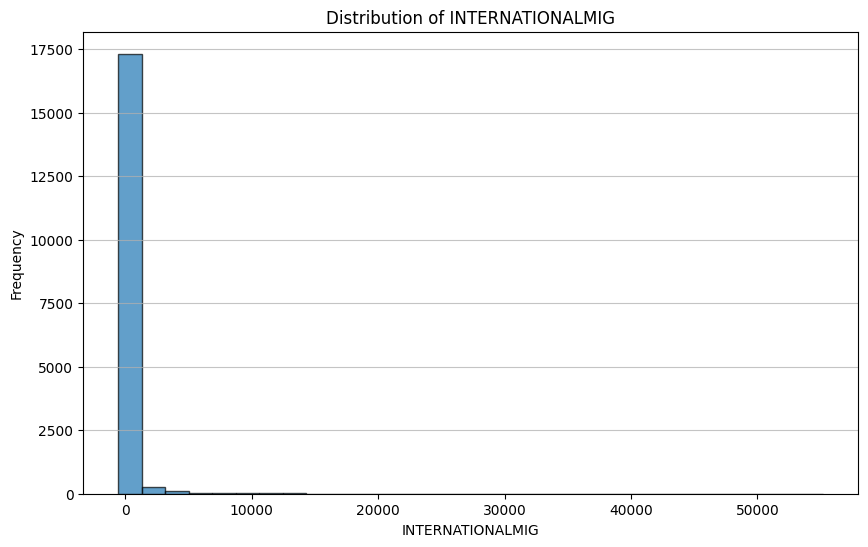

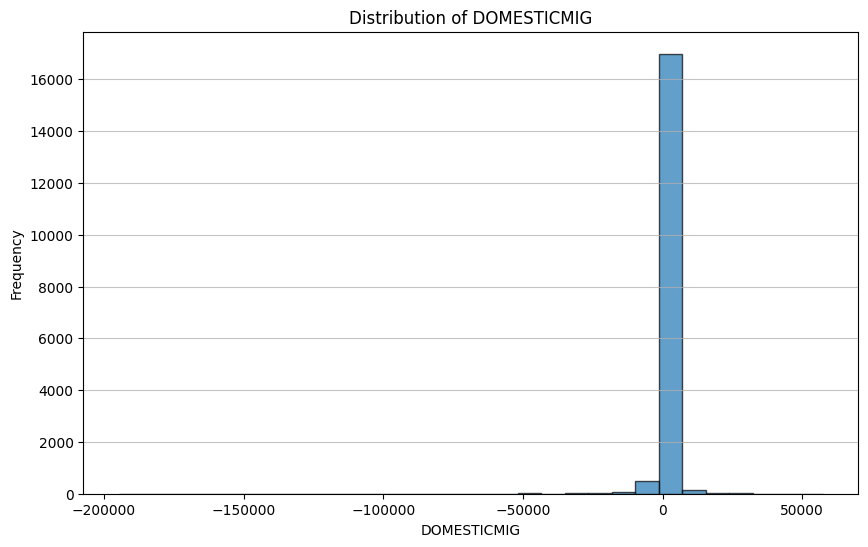

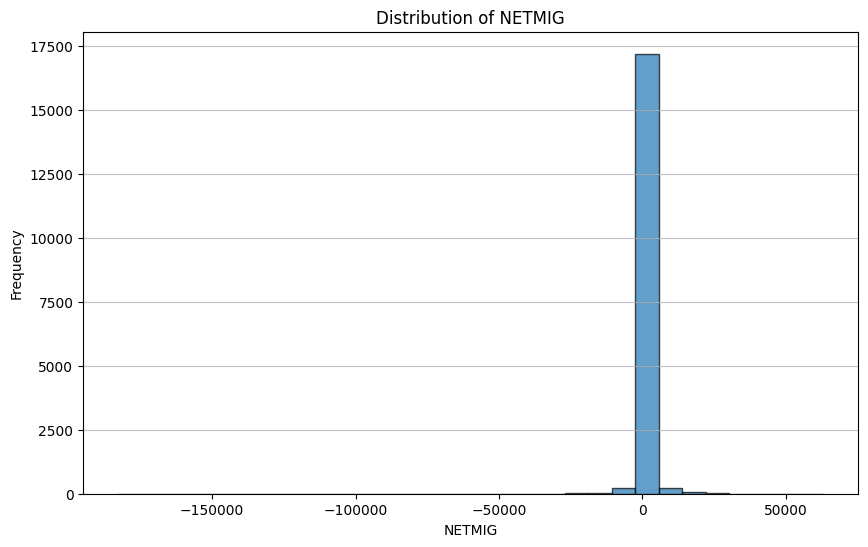

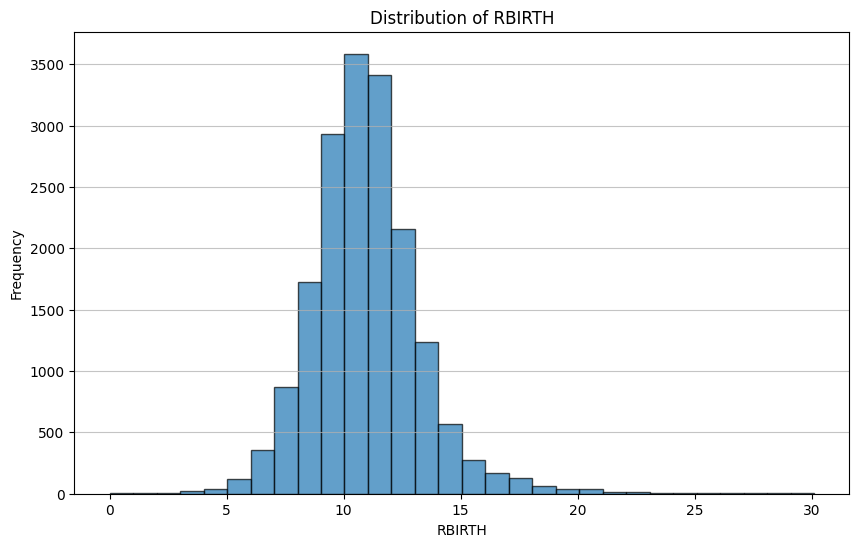

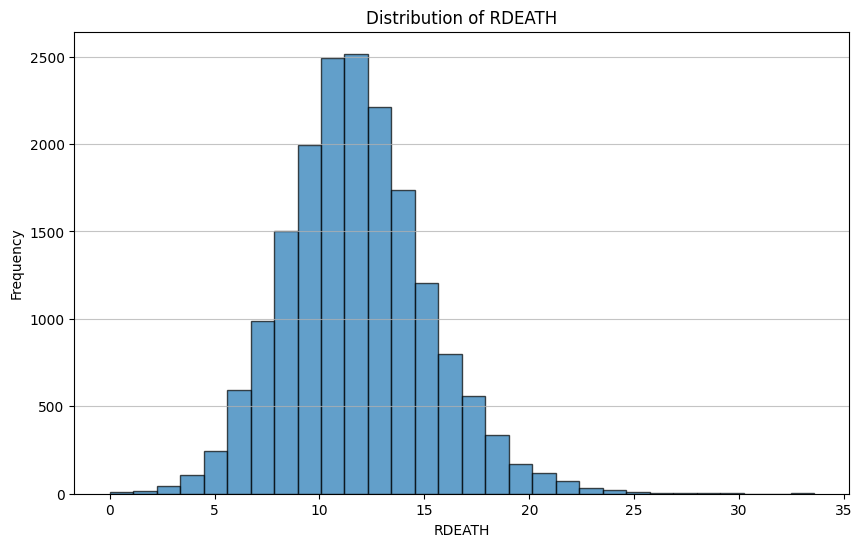

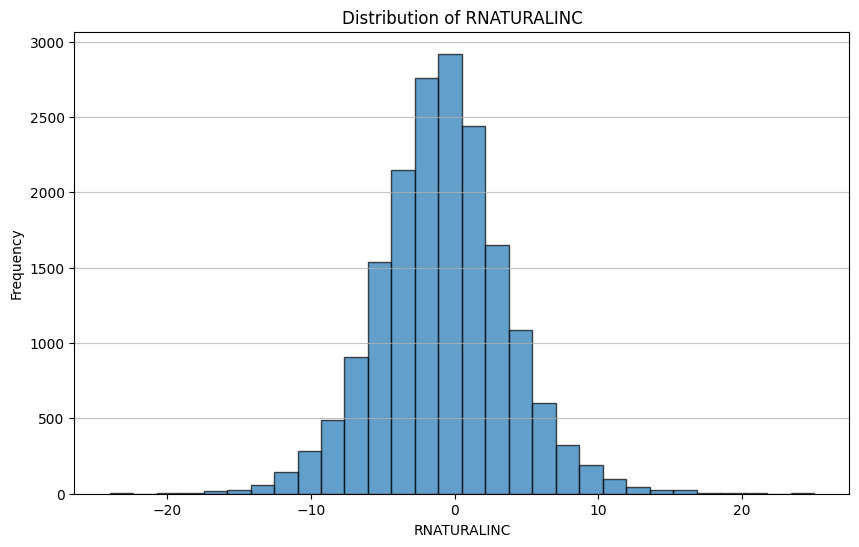

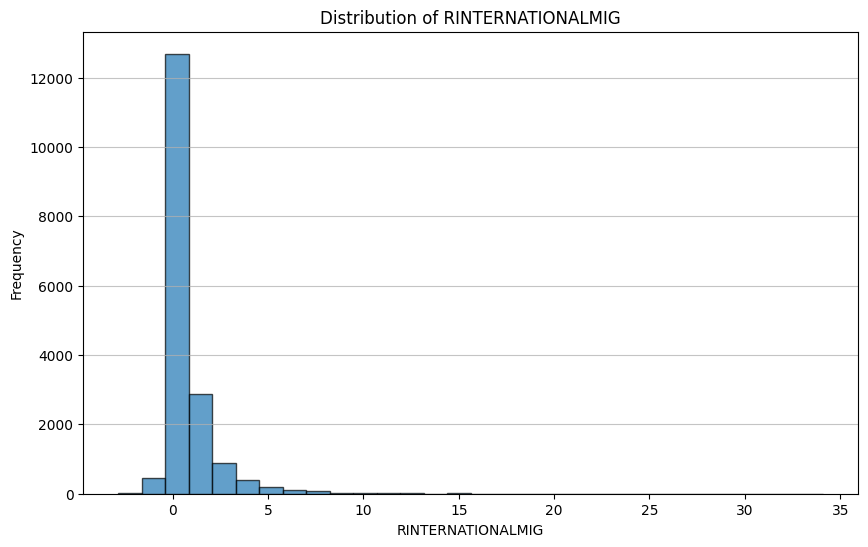

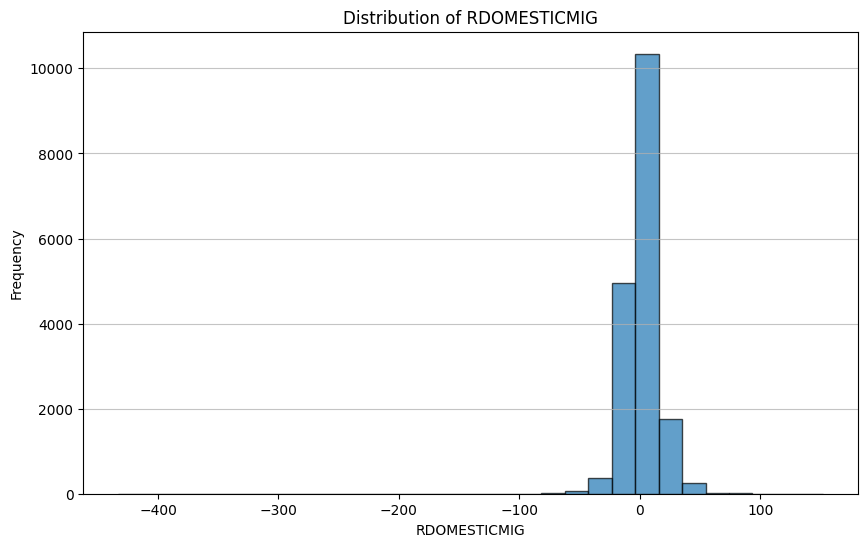

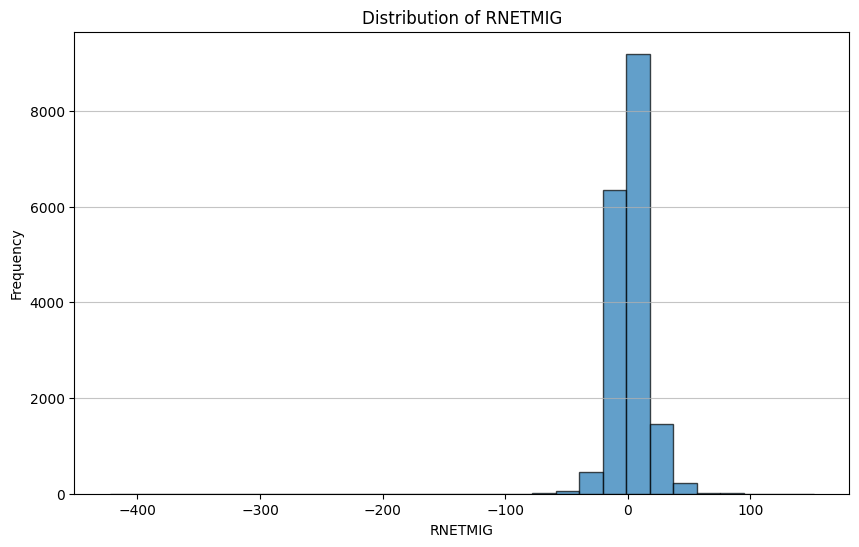

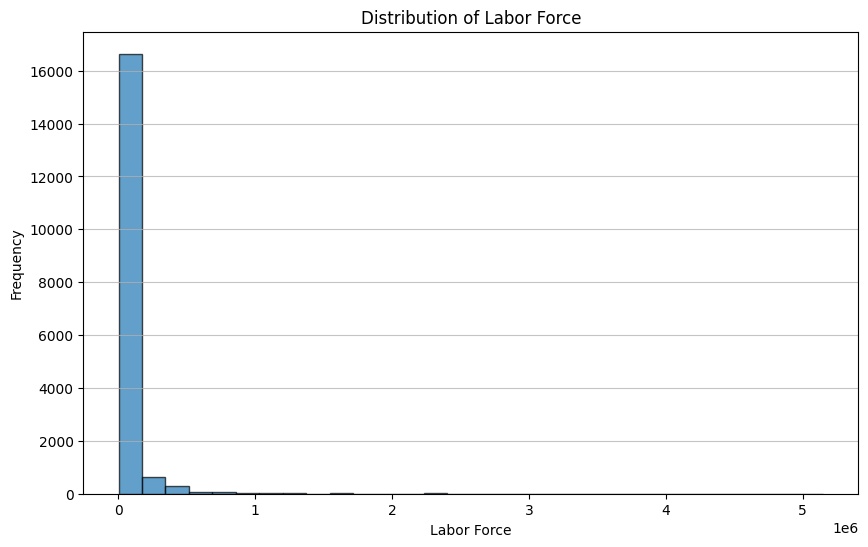

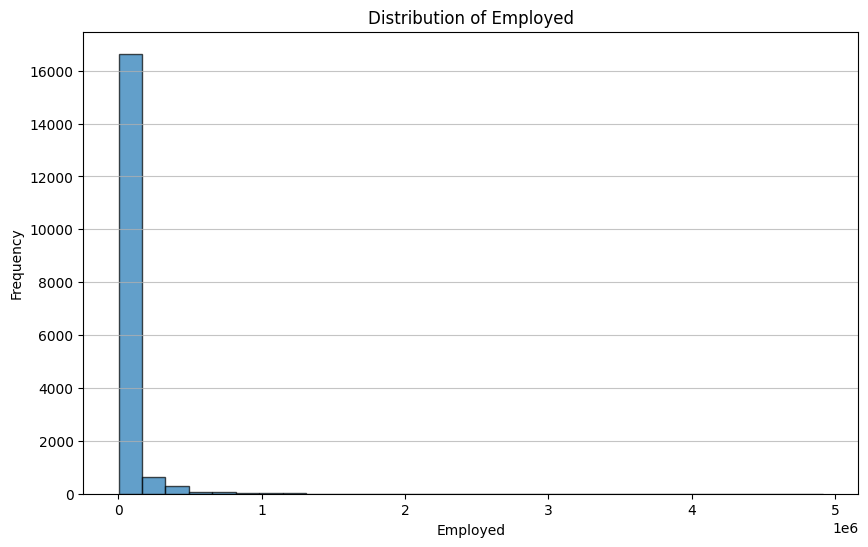

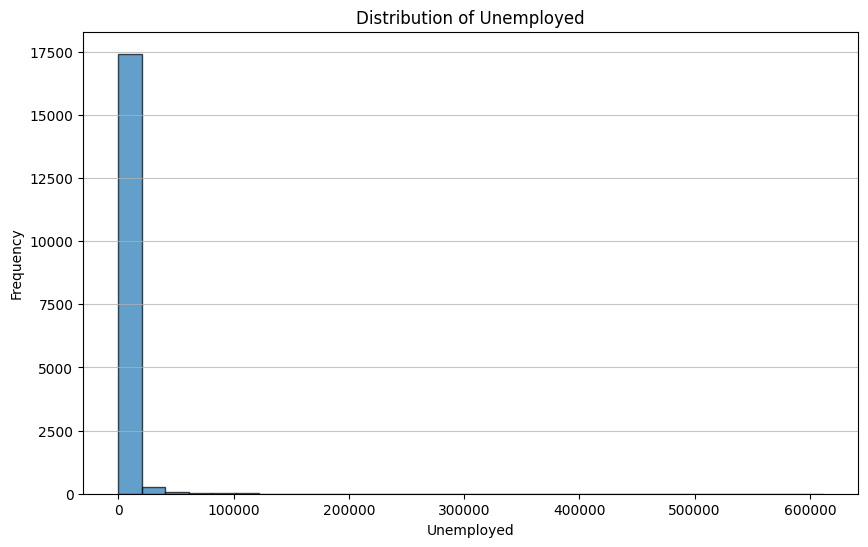

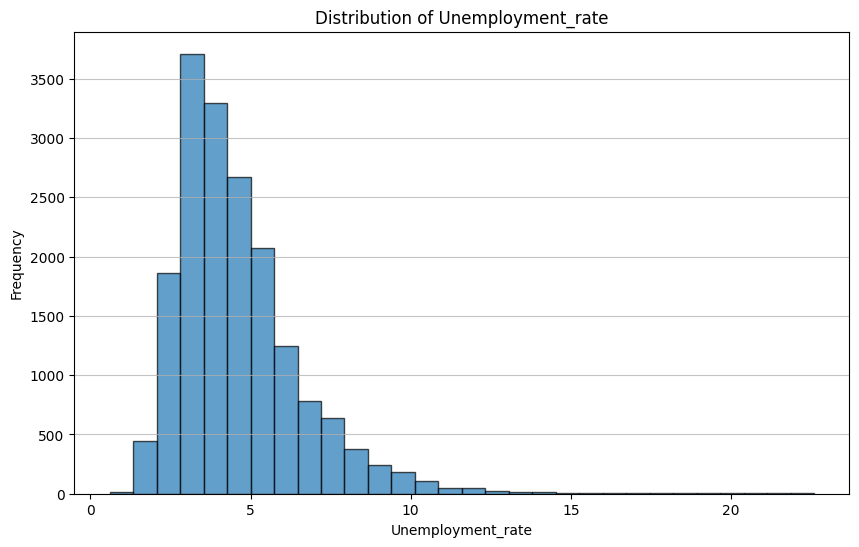

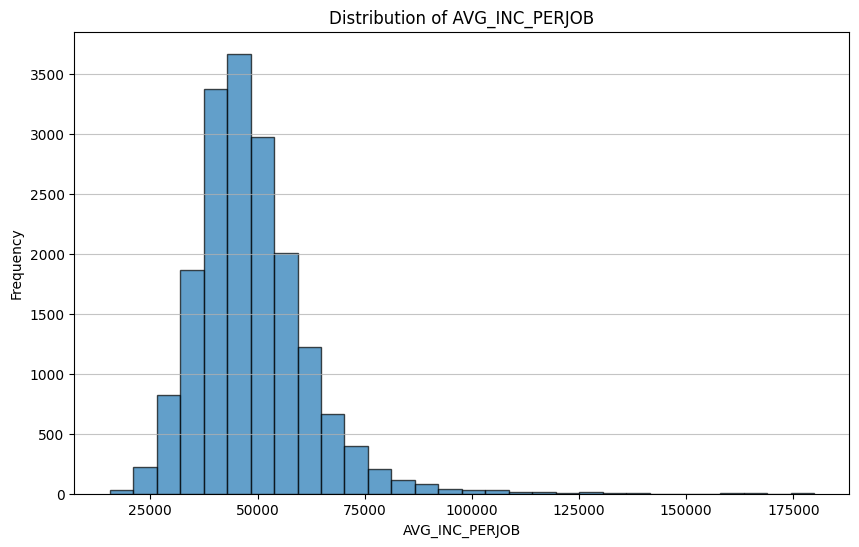

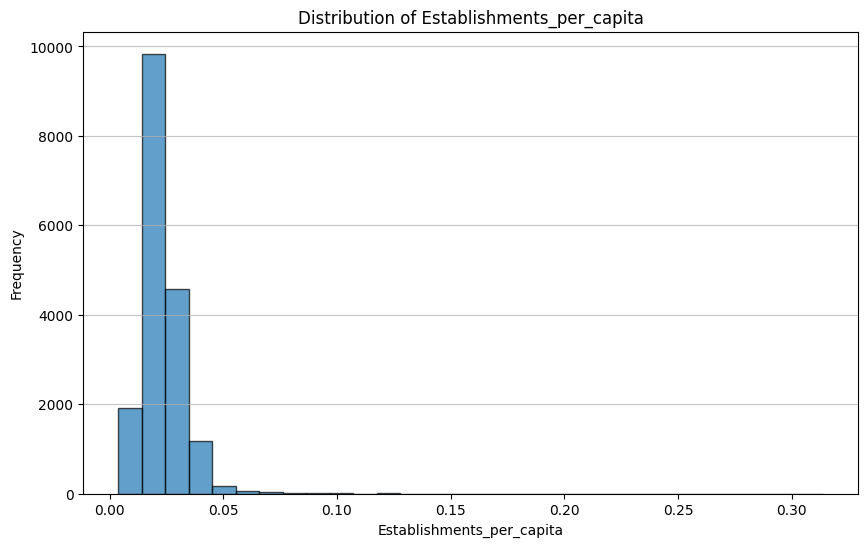

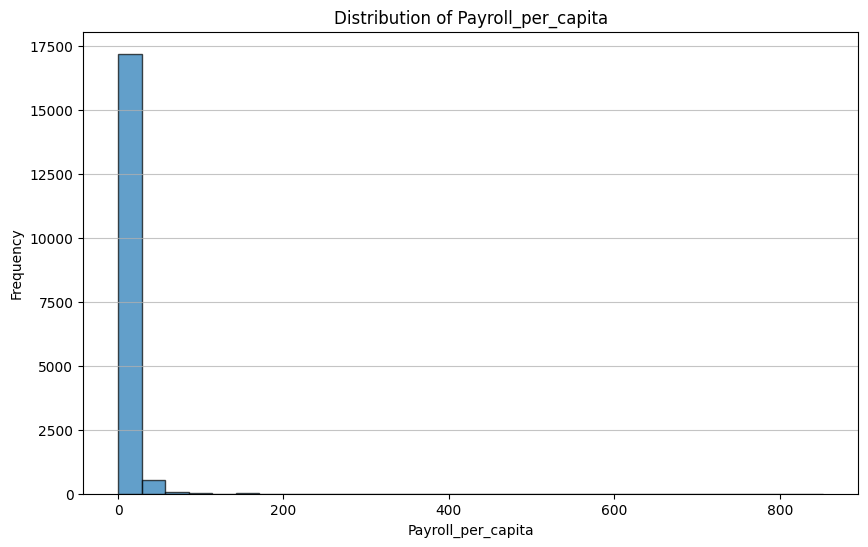

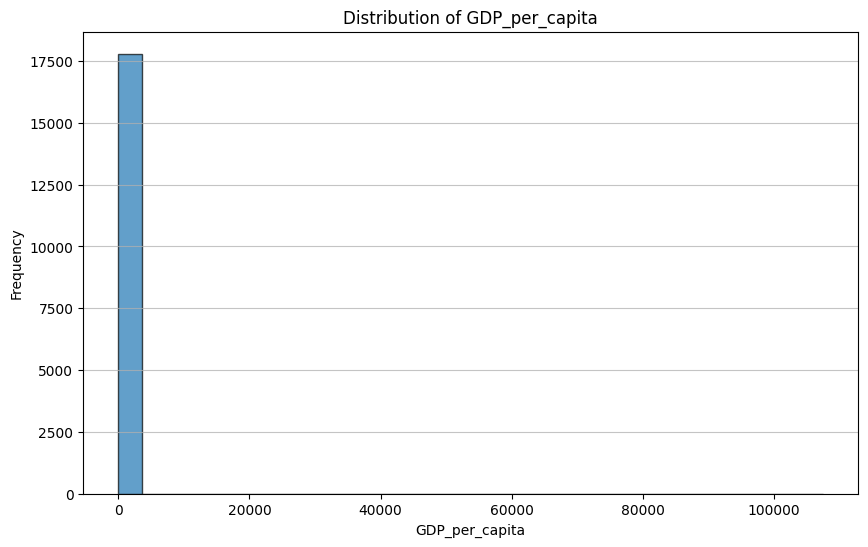

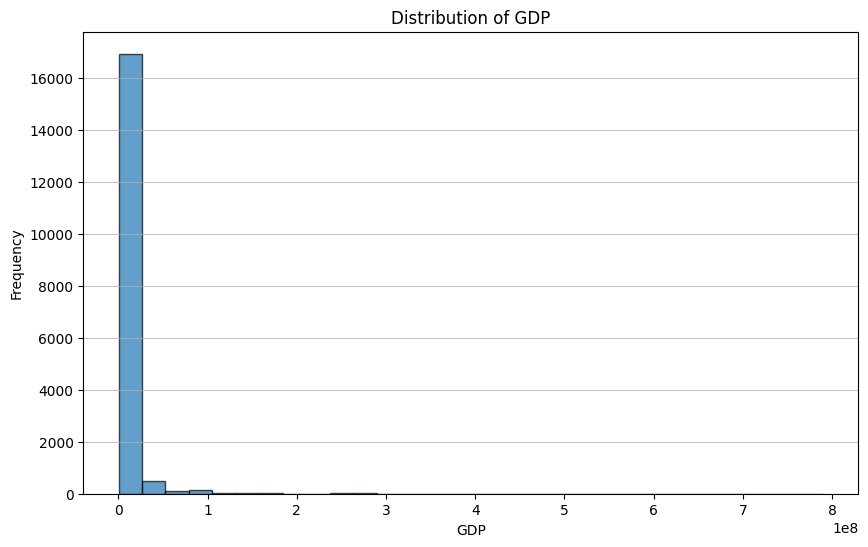

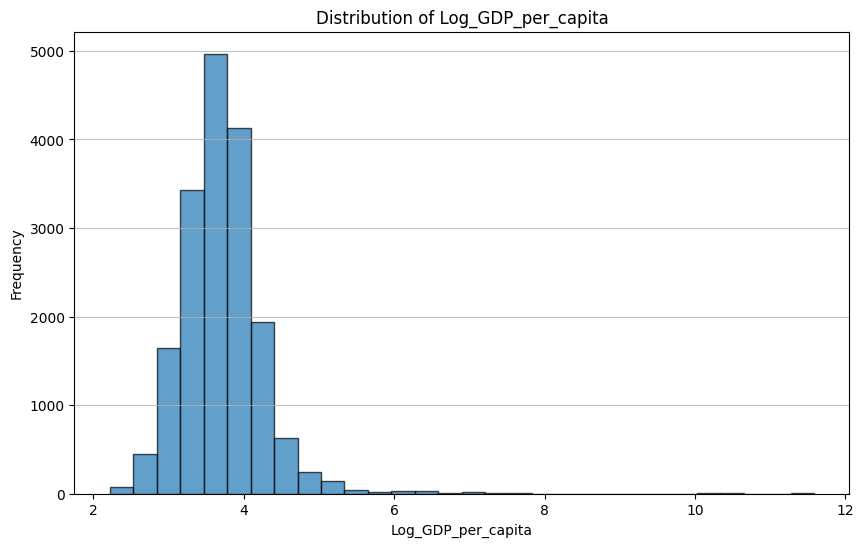

In [40]:
import matplotlib.pyplot as plt

# Selecting the numeric columns for distribution plots
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Creating distribution plots for the numeric columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


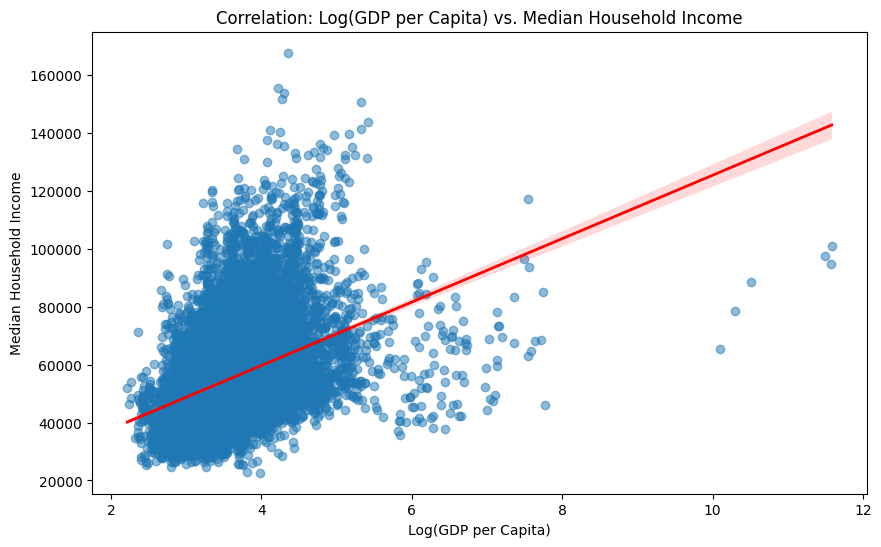

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for log-transformed GDP per capita to avoid issues with zero values
#data['log_GDP_per_capita'] = np.log(data['GDP_per_capita'] + 1)

# Plot the correlation using a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Log_GDP_per_capita', y='Median_Household_Income',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})

# Set plot title and labels
plt.title('Correlation: Log(GDP per Capita) vs. Median Household Income')
plt.xlabel('Log(GDP per Capita)')
plt.ylabel('Median Household Income')

# Display the plot
plt.show()


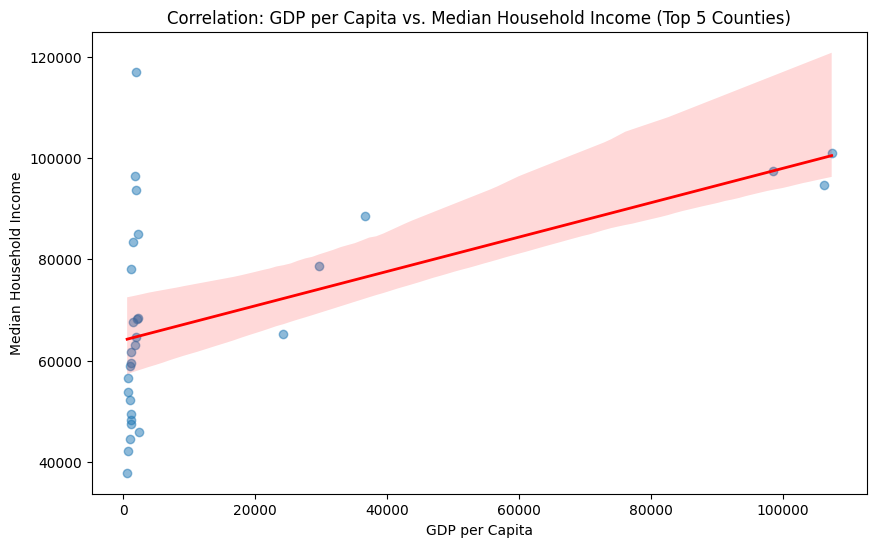

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 5 counties based on average GDP per capita
top_5_counties = data.groupby('County_name')['GDP_per_capita'].mean().nlargest(5).index

# Filter the data to only include the top 5 counties
top_5_data = data[data['County_name'].isin(top_5_counties)]

# Create log-transformed GDP per capita for these counties
#top_5_data['log_GDP_per_capita'] = np.log(top_5_data['GDP_per_capita'] + 1)

# Plot the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=top_5_data, x='GDP_per_capita', y='Median_Household_Income',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})

# Set plot title and labels
plt.title('Correlation: GDP per Capita vs. Median Household Income (Top 5 Counties)')
plt.xlabel('GDP per Capita')
plt.ylabel('Median Household Income')

# Display the plot
plt.show()


In [38]:
# Checking correlations between numerical features
correlation_matrix = data.corr()

# Visualizing correlations and distribution of key variables
import matplotlib.pyplot as plt

# Plotting a heatmap for correlations
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns)
plt.colorbar()
plt.title('Correlation Matrix Heatmap', pad=20)


ValueError: could not convert string to float: 'Autauga County, Alabama'

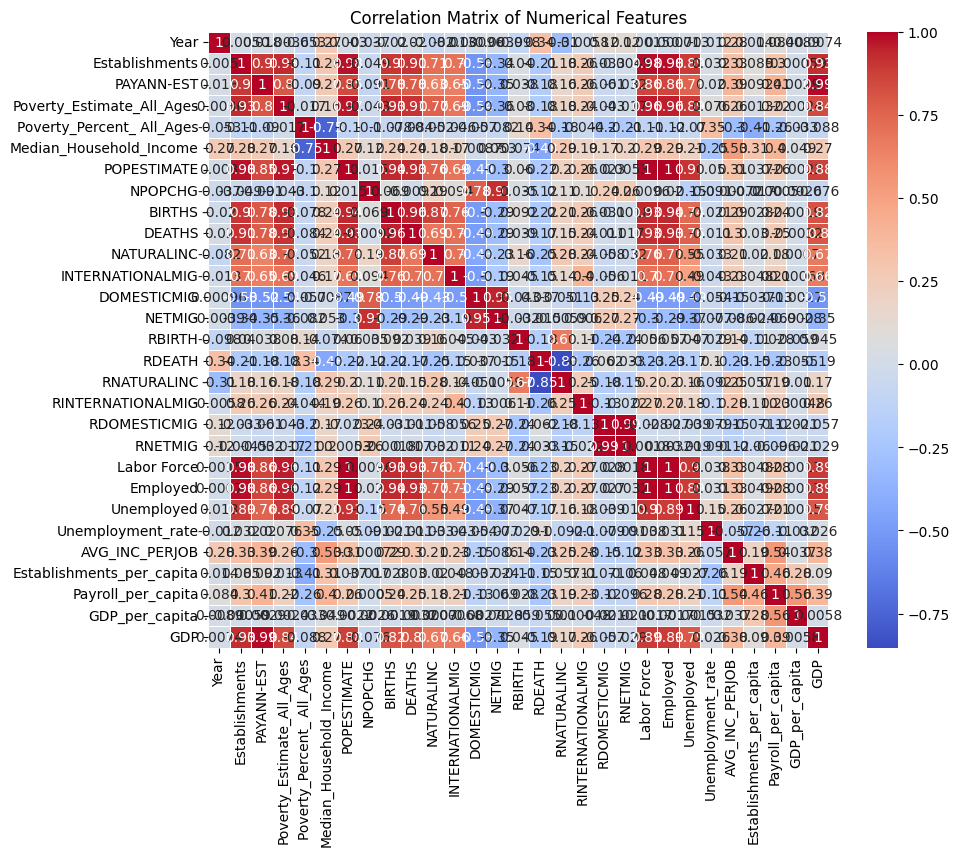

In [4]:
# Selecting only the numerical columns
numerical_data = data.select_dtypes(include=[float, int])

# Checking correlations between numerical features
correlation_matrix = numerical_data.corr()

# Visualizing correlations and distribution of key variables
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Index(['County', 'Postal_Code', 'County_name', 'State_Full_Name', 'Year',
       'GeoFIPS', 'Establishments', 'PAYANN-EST', 'Poverty_Estimate_All_Ages',
       'Poverty_Percent_ All_Ages', 'Median_Household_Income', 'POPESTIMATE',
       'NPOPCHG', 'BIRTHS', 'DEATHS', 'NATURALINC', 'INTERNATIONALMIG',
       'DOMESTICMIG', 'NETMIG', 'RBIRTH', 'RDEATH', 'RNATURALINC',
       'RINTERNATIONALMIG', 'RDOMESTICMIG', 'RNETMIG', 'Labor Force',
       'Employed', 'Unemployed', 'Unemployment_rate', 'AVG_INC_PERJOB',
       'Establishments_per_capita', 'Payroll_per_capita', 'GDP_per_capita',
       'GDP', 'Log_GDP_per_capita'],
      dtype='object')


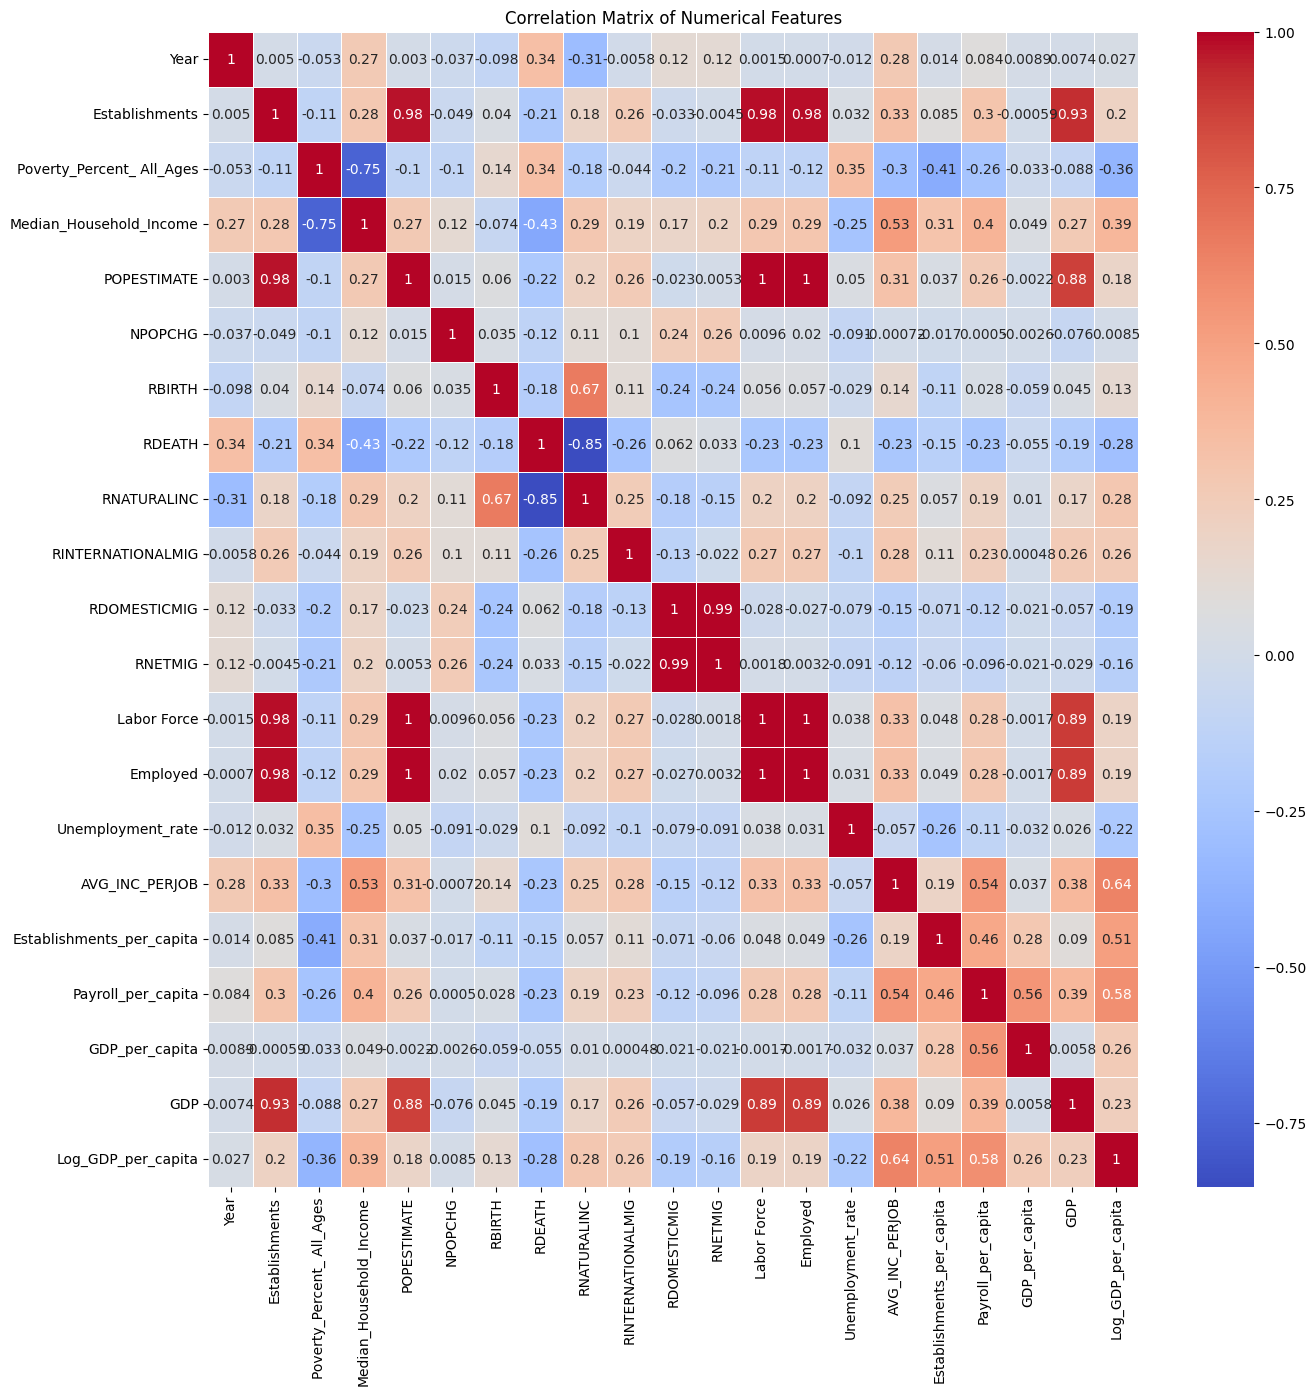

In [7]:
# Check available columns in the DataFrame
print(data.columns)

# Selecting only numerical columns and excluding specific ones (with error handling)
numerical_data = data.select_dtypes(include=[float, int]).drop(
    ['YEAR', 'ESTABLISHMENTS', 'PAYANN-EST', 'Poverty_Estimate_All_Ages', 
     'Unemployed', 'BIRTHS', 'DEATHS', 'NATURALINC', 
     'INTERNATIONALMIG', 'DOMESTICMIG', 'NETMIG'], 
    axis=1, 
    errors='ignore'  # Avoid KeyError for missing columns
)

# Checking correlations between numerical features
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
#print(correlation_matrix)
# Visualizing correlations and distribution of key variables
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [18]:
# Using quantiles to divide the GDP column into three categories
data['GDP_Class'] = pd.qcut(data['GDP_per_capita'], 3, labels=["Low", "Medium", "High"])


In [13]:
data['GDP_Class'].count()

17808

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

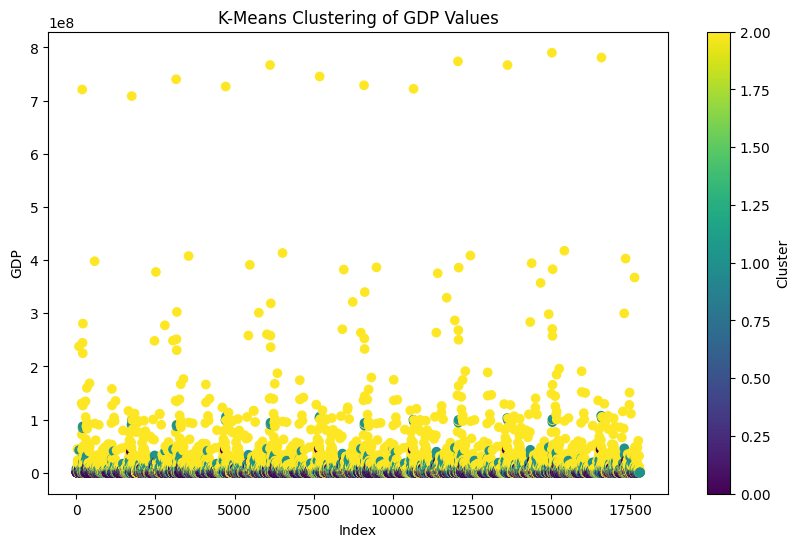

In [19]:
# The issue arises because the 'GDP_Class' column contains labels instead of numeric values for clustering.
# We need to map the labels 'Low', 'Medium', 'High' to numeric values for plotting.

# Let's assign numeric values to the clusters: 'Low' = 0, 'Medium' = 1, 'High' = 2
data['GDP_Class_Numeric'] = data['GDP_Class'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Now, let's create the scatter plot again using the numeric values
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['GDP'], c=data['GDP_Class_Numeric'], cmap='viridis')
plt.title('K-Means Clustering of GDP Values')
plt.xlabel('Index')
plt.ylabel('GDP')
plt.colorbar(label='Cluster')
plt.show()


GDP_Class
Low       5936
Medium    5936
High      5936
Name: count, dtype: int64

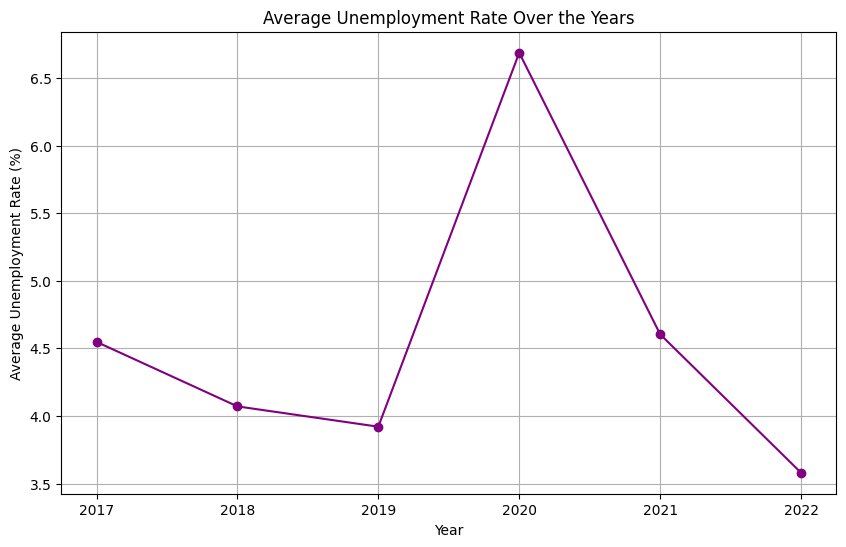

In [22]:
# Let's analyze the trends for unemployment rates across the years
# We'll group by 'Year' and calculate the average unemployment rate for each year

# Grouping by 'Year' and calculating the mean of the unemployment rate
unemployment_trends = data.groupby('Year')['Unemployment_rate'].mean()

# Plotting the unemployment trends over the years
plt.figure(figsize=(10, 6))
plt.plot(unemployment_trends.index, unemployment_trends, marker='o', color='purple')
plt.title('Average Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [23]:
# Extract the GDP per capita column for clustering
gdp_values = data[['GDP_per_capita']].values

# Apply K-Means clustering with 3 clusters (Low, Medium, High)
kmeans = KMeans(n_clusters=3, random_state=0)
data['GDP_Class'] = kmeans.fit_predict(gdp_values)

# Map the numeric clusters to meaningful labels
# Sorting the cluster centers to map 0: Low, 1: Medium, 2: High
cluster_centers = sorted(kmeans.cluster_centers_.flatten())
mapping = {i: label for i, label in enumerate(['Low', 'Medium', 'High'])}
data['GDP_Class'] = data['GDP_Class'].map({i: label for i, label in enumerate(['Low', 'Medium', 'High'])})


c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


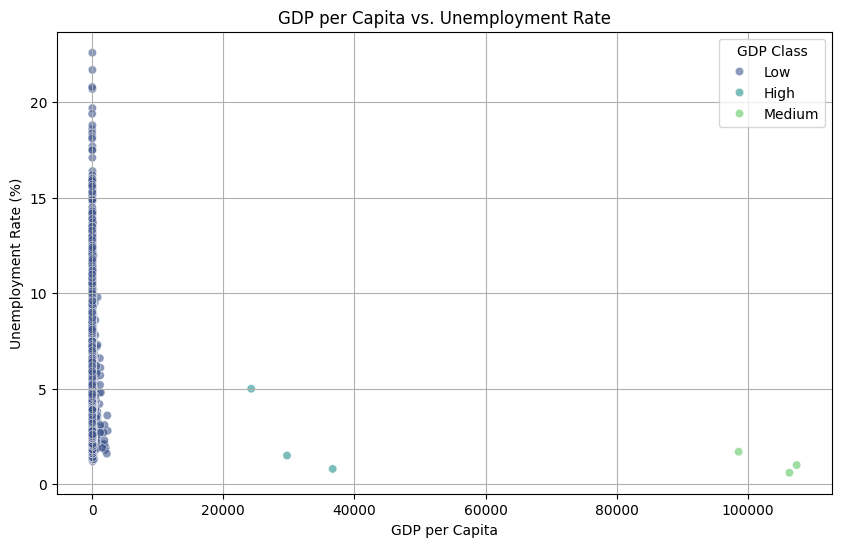

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP_per_capita', y='Unemployment_rate', hue='GDP_Class', palette='viridis', alpha=0.6)
plt.title('GDP per Capita vs. Unemployment Rate')
plt.xlabel('GDP per Capita')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='GDP Class')
plt.grid(True)
plt.show()


In [27]:
correlation = data['GDP_per_capita'].corr(data['Unemployment_rate'])
print(f"Correlation between GDP per Capita and Unemployment Rate: {correlation:.2f}")


Correlation between GDP per Capita and Unemployment Rate: -0.03


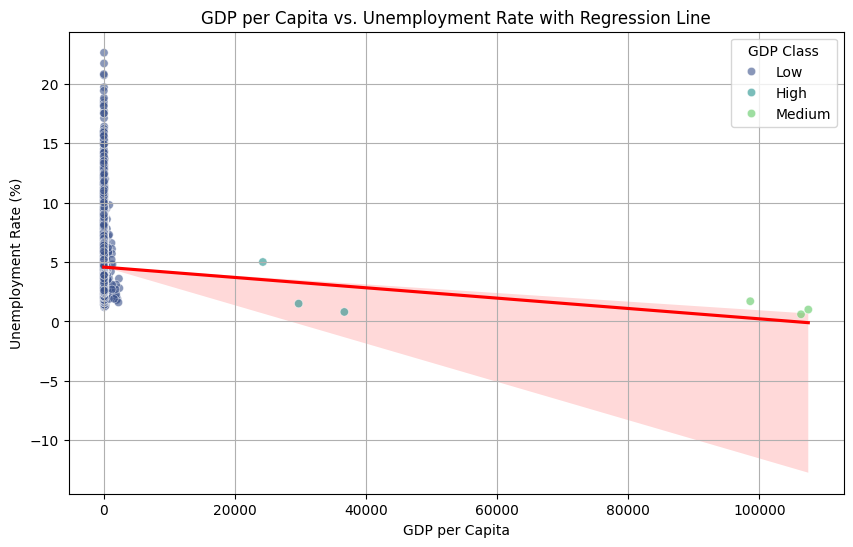

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='GDP_per_capita', y='Unemployment_rate', scatter=False, color='red')
sns.scatterplot(data=data, x='GDP_per_capita', y='Unemployment_rate', hue='GDP_Class', palette='viridis', alpha=0.6)
plt.title('GDP per Capita vs. Unemployment Rate with Regression Line')
plt.xlabel('GDP per Capita')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='GDP Class')
plt.grid(True)
plt.show()


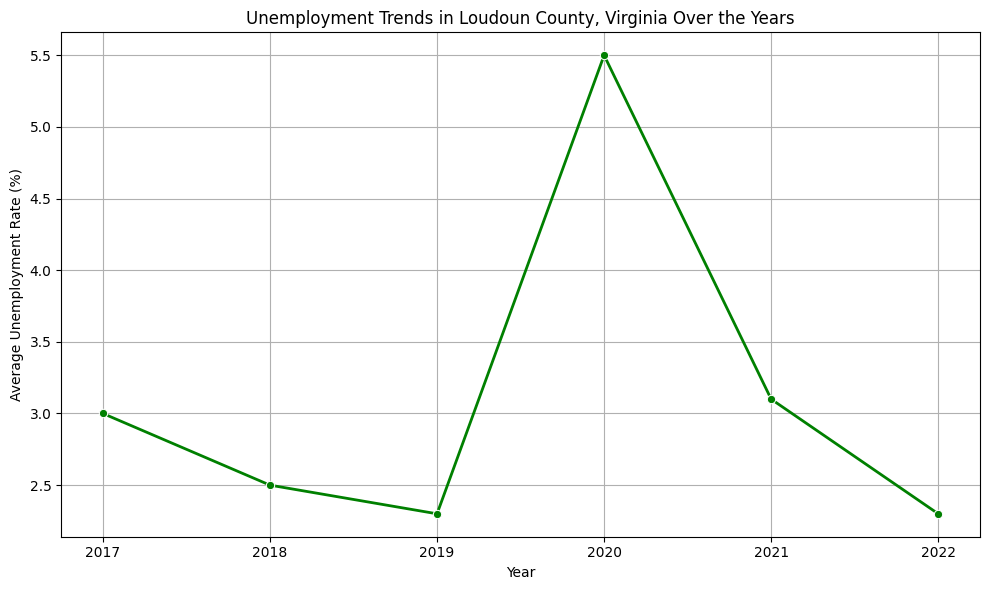

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Loudoun County, Virginia
loudoun_county_data = data[
    (data['County_name'].str.contains('Loudoun County', case=False)) & 
    (data['State_Full_Name'] == 'Virginia')
]

# Group by 'Year' to get the average unemployment rate per year for Loudoun County
loudoun_unemployment_trends = loudoun_county_data.groupby('Year')['Unemployment_rate'].mean().reset_index()

# Plotting the unemployment trends for Loudoun County, Virginia
plt.figure(figsize=(10, 6))
sns.lineplot(data=loudoun_unemployment_trends, x='Year', y='Unemployment_rate', marker='o', linewidth=2, color='green')
plt.title('Unemployment Trends in Loudoun County, Virginia Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


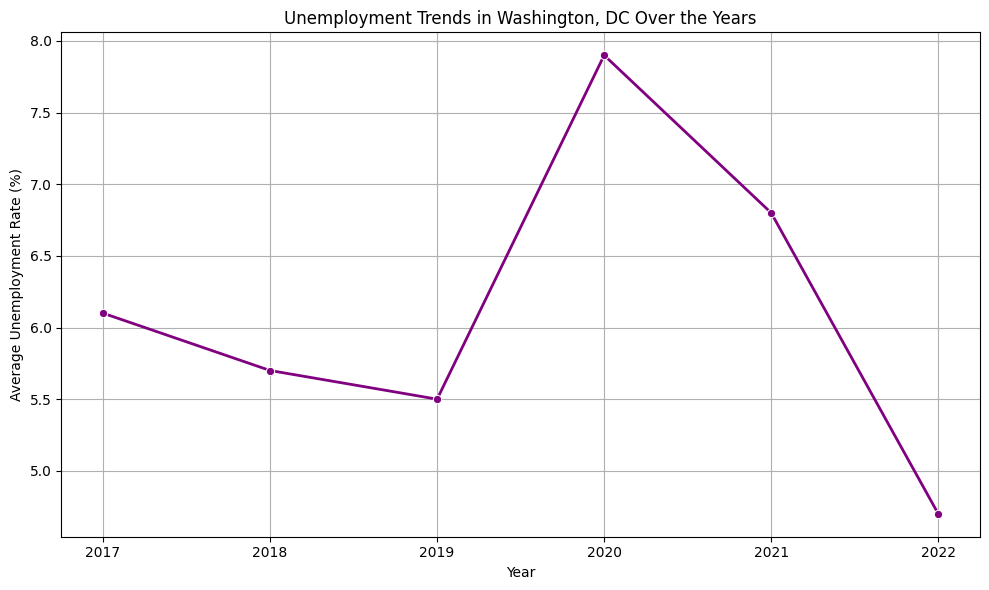

In [31]:
# Filter the data for Washington, DC
washington_dc_unemployment_trends = data[data['State_Full_Name'] == 'District of Columbia']

# Group by 'Year' to get the average unemployment rate per year for Washington, DC
dc_unemployment_trends = washington_dc_unemployment_trends.groupby('Year')['Unemployment_rate'].mean().reset_index()

# Plotting the unemployment trends for Washington, DC
plt.figure(figsize=(10, 6))
sns.lineplot(data=dc_unemployment_trends, x='Year', y='Unemployment_rate', marker='o', linewidth=2, color='purple')
plt.title('Unemployment Trends in Washington, DC Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Filter the data for the years 2017 to 2022
df_filtered = data[data['Year'].between(2017, 2022)]

In [13]:
# Combine county and state into a single column for better labeling
df_filtered['County_State'] = df_filtered['County_name'] + ', ' + df_filtered['State_Full_Name']


In [14]:
# Find the top 5 counties by average GDP per capita
top_5_highest_gdp_counties = df_filtered.groupby('County_State')['GDP_per_capita'].mean().nlargest(5).index


In [15]:
top_5_highest_gdp_counties



Index(['Loving County, Texas', 'McMullen County, Texas',
       'Glasscock County, Texas', 'Upton County, Texas',
       'Martin County, Texas'],
      dtype='object', name='County_State')

In [16]:
# Filter for only the top 5 counties
top_5_gdp_data = df_filtered[df_filtered['County_State'].isin(top_5_highest_gdp_counties)]


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

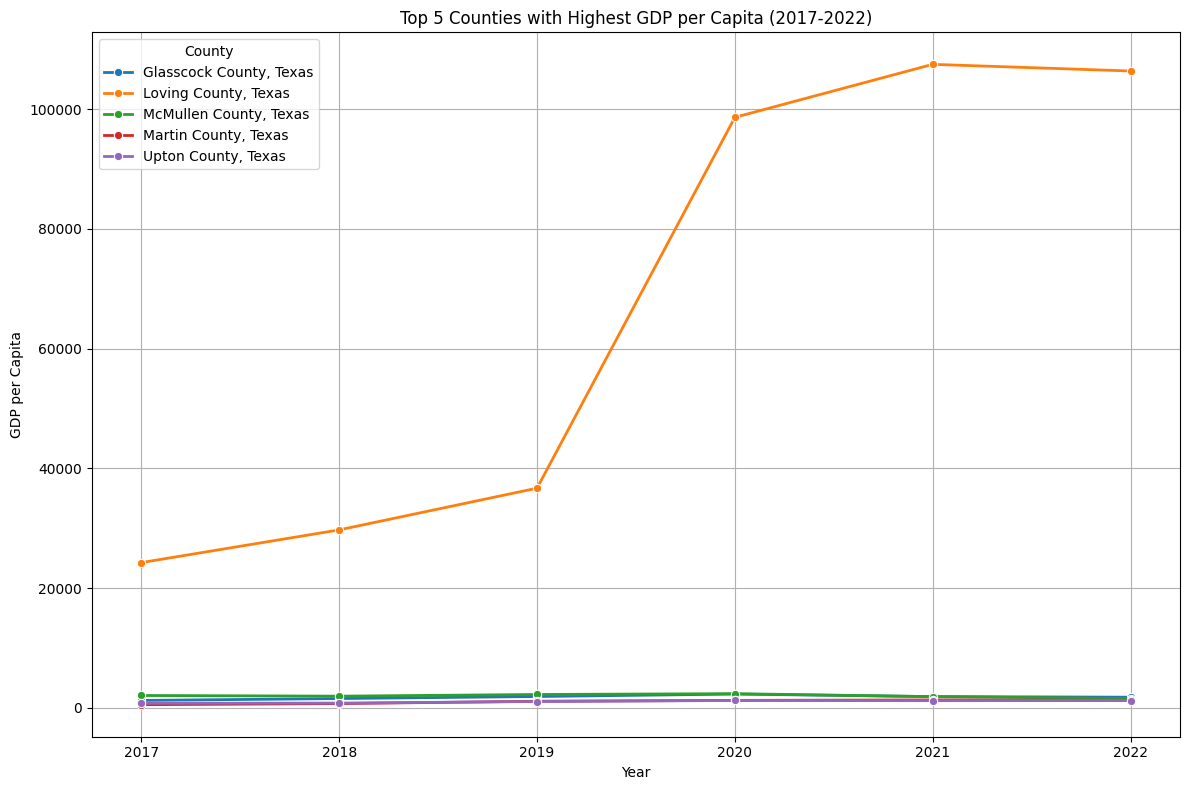

In [18]:
# Plot the trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_gdp_data, x='Year', y='GDP_per_capita', hue='County_State', marker='o', linewidth=2)
plt.title('Top 5 Counties with Highest GDP per Capita (2017-2022)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.legend(title='County')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Let's now extend the analysis to Median Household Income, Poverty Percent, Average Income per Job, and Establishments per Capita.

# Selecting the columns of interest for the analysis
columns_of_interest = ['AVG_INC_PERJOB','Median_Household_Income', 'Poverty_Percent_ All_Ages', 'GDP_per_capita', 'Establishments_per_capita']

# Find the top 5 counties by average values across the columns of interest 
top_5_counties_avginc = df_filtered.groupby('County_State')[columns_of_interest].mean().nlargest(5, 'AVG_INC_PERJOB').index

# Filter the dataset to include only the top 5 counties 
top_5_data_avginc = df_filtered[df_filtered['County_State'].isin(top_5_counties_avginc)]

top_5_counties_avginc

Index(['Santa Clara County, California', 'New York County, New York',
       'San Mateo County, California', 'Sherman County, Texas',
       'District of Columbia, District of Columbia'],
      dtype='object', name='County_State')

Text(0, 0.5, 'Average Income per Job')

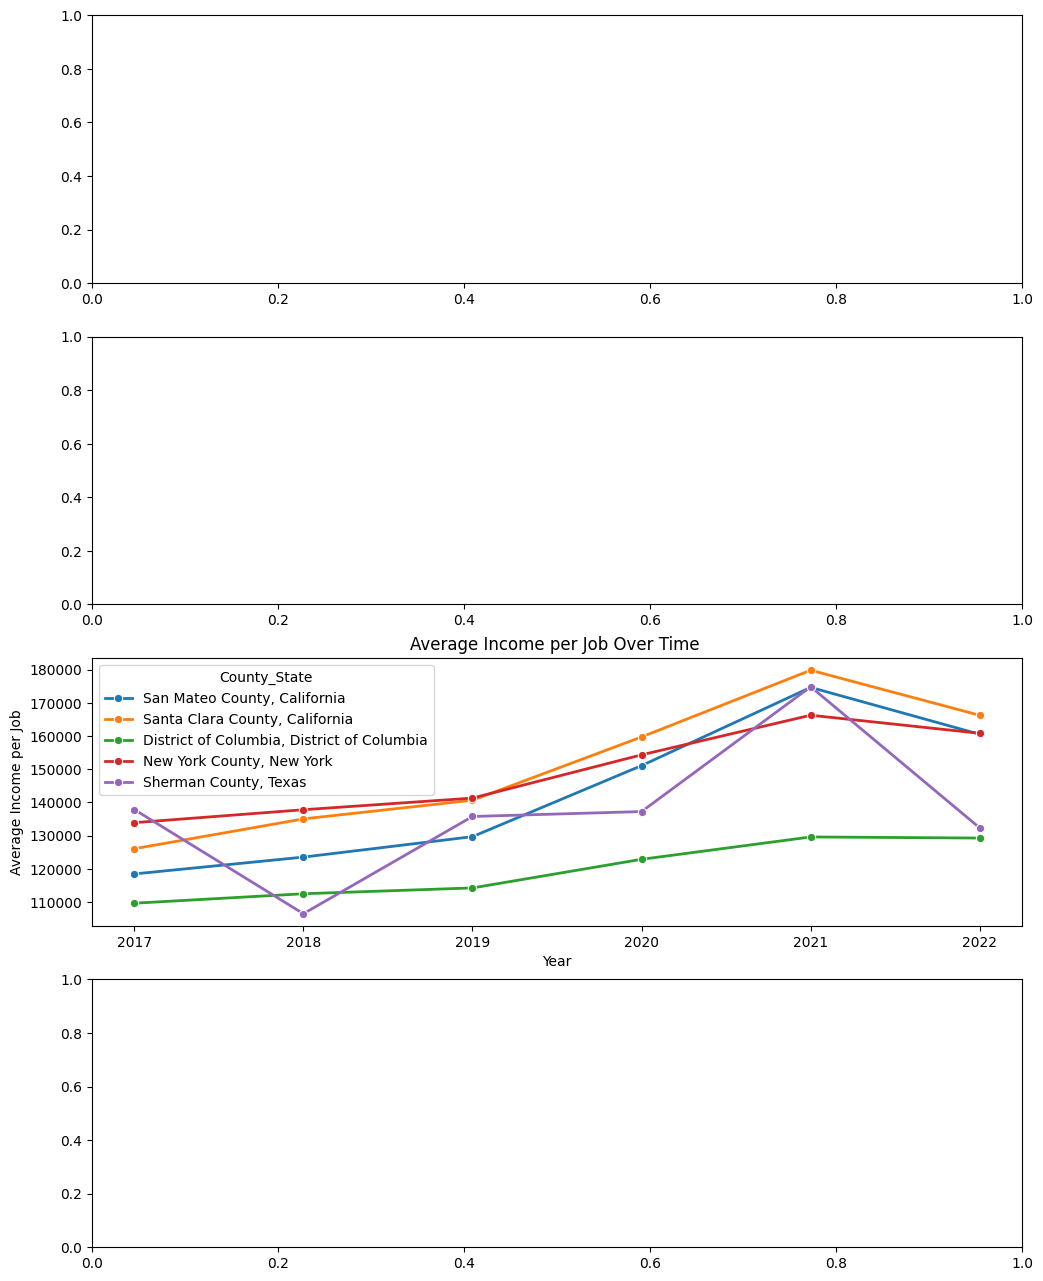

In [24]:
# Plot the trends for each metric
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Average Income per Job (AVG_INC_PERJOB)
sns.lineplot(data=top_5_data_avginc, x='Year', y='AVG_INC_PERJOB', hue='County_State', marker='o', linewidth=2, ax=axes[2])
axes[2].set_title('Average Income per Job Over Time ')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Income per Job')

Median Household Income

In [28]:
# Let's now extend the analysis to Median Household Income, Poverty Percent, Average Income per Job, and Establishments per Capita.

# Selecting the columns of interest for the analysis
columns_of_interest = ['AVG_INC_PERJOB','Median_Household_Income', 'Poverty_Percent_ All_Ages', 'GDP_per_capita', 'Establishments_per_capita']

# Find the top 5 counties by average values across the columns of interest 
top_5_counties_med = df_filtered.groupby('County_State')[columns_of_interest].mean().nlargest(5, 'Median_Household_Income').index

# Filter the dataset to include only the top 5 counties 
top_5_data_med = df_filtered[df_filtered['County_State'].isin(top_5_counties_med)]
top_5_counties_med


Index(['Loudoun County, Virginia', 'Santa Clara County, California',
       'San Mateo County, California', 'Los Alamos County, New Mexico',
       'Douglas County, Colorado'],
      dtype='object', name='County_State')

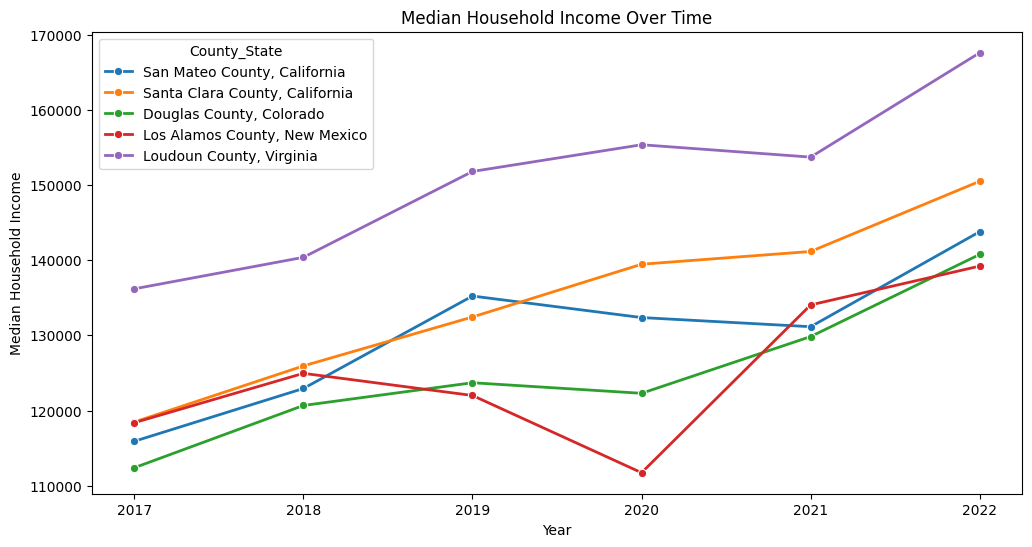

In [29]:
# Correcting 'Meadian' to 'Median' in the code for consistent labeling

plt.figure(figsize=(12, 6))

# Median Household Income Over Time
sns.lineplot(data=top_5_data_med, x='Year', y='Median_Household_Income', hue='County_State', marker='o', linewidth=2)

# Setting titles and labels
plt.title('Median Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income')

# Displaying the chart
plt.show()


In [30]:
# Let's now extend the analysis to Median Household Income, Poverty Percent, Average Income per Job, and Establishments per Capita.

# Selecting the columns of interest for the analysis
columns_of_interest = ['AVG_INC_PERJOB','Median_Household_Income', 'Poverty_Percent_ All_Ages', 'GDP_per_capita', 'Establishments_per_capita']

# Find the top 5 counties by average values across the columns of interest 
top_5_counties_pov = df_filtered.groupby('County_State')[columns_of_interest].mean().nlargest(5, 'Poverty_Percent_ All_Ages').index

# Filter the dataset to include only the top 5 counties 
top_5_data_pov = df_filtered[df_filtered['County_State'].isin(top_5_counties_pov)]
top_5_counties_pov


Index(['Ziebach County, South Dakota', 'Todd County, South Dakota',
       'Oglala Lakota County, South Dakota', 'Issaquena County, Mississippi',
       'Crowley County, Colorado'],
      dtype='object', name='County_State')

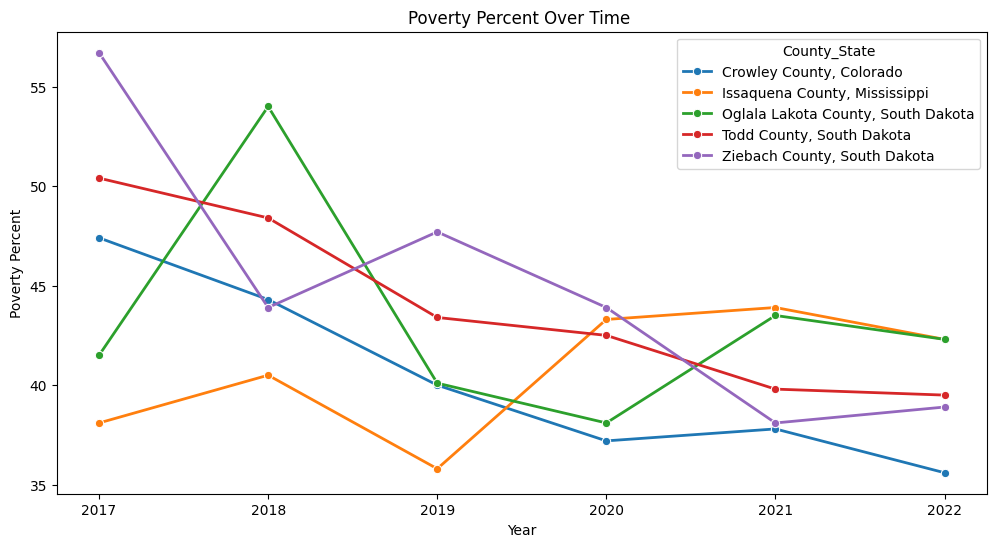

In [31]:
plt.figure(figsize=(12, 6))

# Poverty Percent Over Time
sns.lineplot(data=top_5_data_pov, x='Year', y='Poverty_Percent_ All_Ages', hue='County_State', marker='o', linewidth=2)

# Setting titles and labels
plt.title('Poverty Percent Over Time ')
plt.xlabel('Year')
plt.ylabel('Poverty Percent')

# Displaying the chart
plt.show()

Establishments per capita


In [36]:
# Let's now extend the analysis to Median Household Income, Poverty Percent, Average Income per Job, and Establishments per Capita.

# Selecting the columns of interest for the analysis
columns_of_interest = ['AVG_INC_PERJOB','Median_Household_Income', 'Poverty_Percent_ All_Ages', 'GDP_per_capita', 'Establishments']

# Find the top 5 counties by average values across the columns of interest 
top_5_counties_est = df_filtered.groupby('County_State')[columns_of_interest].mean().nlargest(5, 'Establishments').index

# Filter the dataset to include only the top 5 counties 
top_5_data_est = df_filtered[df_filtered['County_State'].isin(top_5_counties_est)]
top_5_counties_est


Index(['Los Angeles County, California', 'Cook County, Illinois',
       'Harris County, Texas', 'Orange County, California',
       'Maricopa County, Arizona'],
      dtype='object', name='County_State')

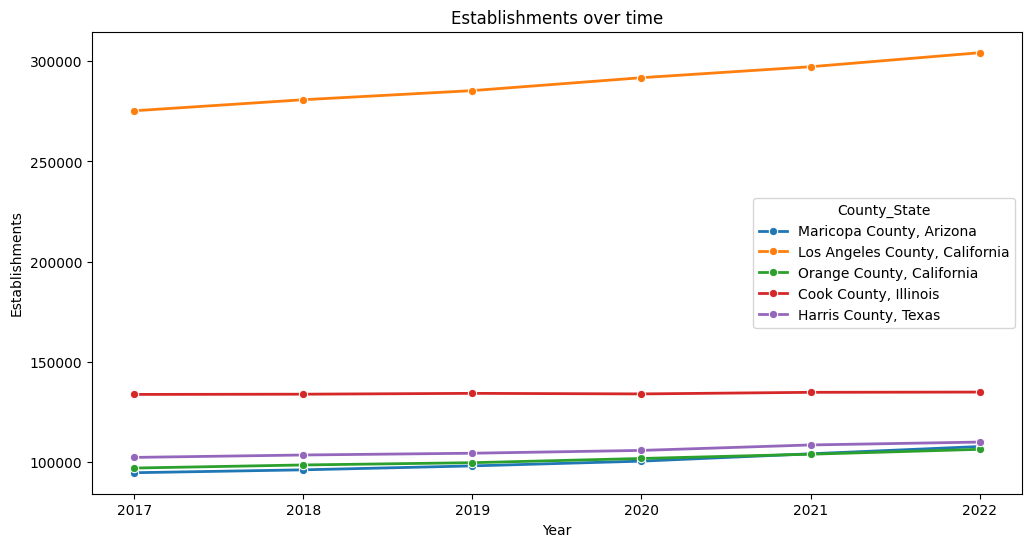

In [37]:
plt.figure(figsize=(12, 6))

# Poverty Percent Over Time
sns.lineplot(data=top_5_data_est, x='Year', y='Establishments', hue='County_State', marker='o', linewidth=2)

# Setting titles and labels
plt.title('Establishments over time')
plt.xlabel('Year')
plt.ylabel('Establishments')

# Displaying the chart
plt.show()